In [ ]:
import pandas as pd
import numpy as np

In [ ]:
inventory_dataset = pd.read_csv("inventory_dataset.csv")
peckinge_dataset = pd.read_csv("peckinge_dataset.csv")

In [ ]:
inventory_dataset.head()

,Pelvis_x,Pelvis_y,Pelvis_z,L5_x,L5_y,L5_z,L3_x,L3_y,L3_z,T12_x,...,LeftUpperLeg_z,LeftLowerLeg_x,LeftLowerLeg_y,LeftLowerLeg_z,LeftFoot_x,LeftFoot_y,LeftFoot_z,LeftToe_x,LeftToe_y,LeftToe_z
0,0.068014,0.749467,0.951387,0.065755,0.743763,0.945656,0.063246,0.740317,0.945693,0.060844,...,0.968319,0.067335,0.773283,0.845203,0.081444,0.783253,0.080349,0.098845,0.769303,0.083381
1,0.068135,0.749473,0.951040,0.065880,0.743810,0.945408,0.063359,0.740397,0.945457,0.060938,...,0.967726,0.067459,0.773427,0.843701,0.081471,0.783361,0.078390,0.098871,0.769416,0.081280
2,0.068255,0.749479,0.950695,0.066004,0.743856,0.945163,0.063472,0.740477,0.945221,0.061032,...,0.967135,0.067584,0.773572,0.842200,0.081498,0.783469,0.076438,0.098897,0.769530,0.079179
3,0.068372,0.749498,0.950405,0.066123,0.743910,0.944954,0.063579,0.740559,0.945020,0.061122,...,0.966642,0.067715,0.773705,0.840949,0.081513,0.783550,0.074852,0.098914,0.769617,0.077657
4,0.068483,0.749534,0.950214,0.066230,0.743972,0.944811,0.063675,0.740645,0.944881,0.061204,...,0.966310,0.067855,0.773822,0.840103,0.081506,0.783587,0.073853,0.098914,0.769664,0.077100


In [ ]:
peckinge_dataset.head()

,Pelvis_x,Pelvis_y,Pelvis_z,L5_x,L5_y,L5_z,L3_x,L3_y,L3_z,T12_x,...,LeftUpperLeg_z,LeftLowerLeg_x,LeftLowerLeg_y,LeftLowerLeg_z,LeftFoot_x,LeftFoot_y,LeftFoot_z,LeftToe_x,LeftToe_y,LeftToe_z
0,0.079830,0.864688,0.671853,0.079532,0.858807,0.854355,0.081614,0.846043,0.947130,0.082259,...,0.727127,0.082495,0.863089,0.434136,0.082813,0.856869,0.083565,0.106956,0.840893,0.023704
1,0.079842,0.864671,0.672392,0.079545,0.858803,0.854917,0.081632,0.846051,0.947364,0.082283,...,0.727115,0.082662,0.863019,0.433361,0.082802,0.856903,0.083192,0.106972,0.840950,0.025200
2,0.079854,0.864654,0.672943,0.079558,0.858798,0.855478,0.081650,0.846059,0.947598,0.082306,...,0.727090,0.082829,0.862949,0.432576,0.082792,0.856938,0.082826,0.106988,0.841006,0.026696
3,0.079881,0.864641,0.673283,0.079584,0.858794,0.855837,0.081680,0.846066,0.947744,0.082342,...,0.727040,0.083062,0.862838,0.431703,0.082779,0.856948,0.082562,0.106997,0.841040,0.027954
4,0.079930,0.864631,0.673401,0.079632,0.858787,0.855944,0.081730,0.846068,0.947785,0.082396,...,0.727040,0.083375,0.862662,0.430733,0.082758,0.856914,0.082381,0.106993,0.841034,0.028858


In [ ]:
def import_data(dataframe, classe):
  train_data = np.empty((0,69))
  train_classe = np.empty((0,1))
  for i in range(len(dataframe)):
    train_data=np.concatenate((train_data,dataframe.iloc[[i]]))
    train_classe=np.concatenate((train_classe,[[classe]]))
  return train_data, train_classe

In [ ]:
x_pecking_data, y_pecking_data = import_data(peckinge_dataset,1)
x_inventory_data, y_inventory_data = import_data(inventory_dataset,2)

In [ ]:
X = np.concatenate((x_pecking_data,x_inventory_data), axis = 0)
y = np.concatenate((y_pecking_data,y_inventory_data), axis = 0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (precision_score, recall_score, f1_score, accuracy_score, confusion_matrix)
#fit the model with naive Bayes algorithm
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
#Prédire les données de test
y_pred_nb = model_nb.predict(X_test) 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clmodel_svm = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clmodel_svm.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = clmodel_svm.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.cluster import KMeans
from sklearn import model_selection
model_km = KMeans(2)
#Entrainer le modéle K-means en utilisant X_train 
model_km.fit(X_train, y_train)
#Cross validation 10_fold
succes = model_selection.cross_val_score(model_km, X, y, cv=10,scoring='accuracy')
print('Résultat : ', succes)
#Prédire les données de test
y_pred_km = model_km.predict(X_test) 

Résultat :  [0.59310684 0.72427376 0.5783358  0.46371246 0.48133924 0.
 0.         0.         0.         0.        ]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn import model_selection
model_knn = KNeighborsClassifier(10)
# entrainer le modéle en utilisant X_train
model_knn.fit(X_train, y_train)
#10_fold Cross validation
succes = model_selection.cross_val_score(model_knn, X, y, cv=10,scoring='accuracy')
print('succes : ', succes)
#evaluate the model
y_pred_knn = model_knn.predict(X_test) 

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

succes :  [0.98444116 0.95736091 0.90231413 0.96779911 0.80482521 0.7248646
 0.78254875 0.92791018 0.96119756 0.85729762]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def resultat(y_test, y_pred):
  #Matrice de confusion
  confusion_m= confusion_matrix(y_test, y_pred) 
  sns.heatmap(confusion_m,  cmap='Blues', annot=True)
  print("Matrice de confusion \n", confusion_m) 
  acc = accuracy_score(y_test,y_pred) 
  print("Accuracy : ",acc)
  #Precision
  precision = precision_score(y_test,y_pred, pos_label='positive',average='micro')
  print("precision : ",precision)
  #Rappel
  rappel = recall_score(y_test,y_pred,pos_label='positive',average='micro')
  print("Rappel : ",rappel)
  #F-mesure
  f_mesure=f1_score(y_test, y_pred, labels=None, pos_label=1, average='micro',sample_weight=None,zero_division='warn') 
  print("f_mesure : ",f_mesure) 


Matrice de confusion 
 [[13374  1969]
 [ 2322 12799]]
Accuracy :  0.8591452205882353
precision :  0.8591452205882353
Rappel :  0.8591452205882353
f_mesure :  0.8591452205882353


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


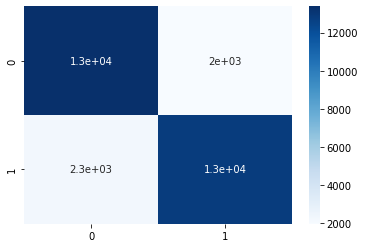

In [ ]:
resultat(y_test, y_pred_nb)

Matrice de confusion 
 [[   0    0    0]
 [6928 8415    0]
 [7545 7576    0]]
Accuracy :  0.27622767857142855
precision :  0.27622767857142855
Rappel :  0.27622767857142855
f_mesure :  0.27622767857142855


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


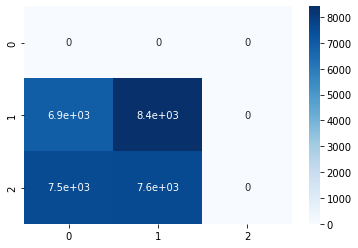

In [ ]:
resultat(y_test, y_pred_km)

Matrice de confusion 
 [[15343     0]
 [   12 15109]]
Accuracy :  0.9996060924369747
precision :  0.9996060924369747
Rappel :  0.9996060924369747
f_mesure :  0.9996060924369747


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


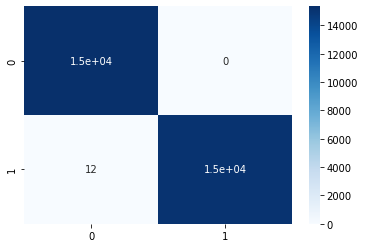

In [ ]:
resultat(y_test, y_pred_knn)

Matrice de confusion 
 [[15308    35]
 [  141 14980]]
Accuracy :  0.9942226890756303
precision :  0.9942226890756303
Rappel :  0.9942226890756303
f_mesure :  0.9942226890756303


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


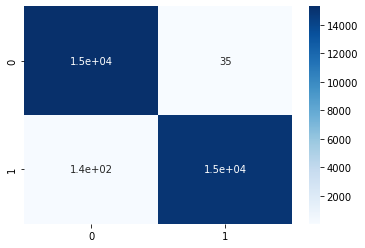

In [ ]:
resultat(y_test, y_pred_svm)